IMPORTING ALL THE LIBRARIES


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

IMPORTING ALL THE DATA

In [40]:
df=pd.read_csv("C:/Users/Dell/Downloads/ML case Study.csv",header=0)
df_Colleges=pd.read_csv("C:/Users/Dell/Downloads/Colleges.csv",header=0)
df_Cities=pd.read_csv("C:/Users/Dell/Downloads/cities.csv",header=0)

In [19]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [39]:
df_Colleges.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [41]:
df_Cities

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat              NaN

1) DATA-PROCESSING

CONVERTING THE COLUMNS IN THE DATAFRAME INTO LISTS

In [42]:
Tier1=df_Colleges["Tier 1"].tolist()

In [43]:
Tier2=df_Colleges["Tier 2"].tolist()

In [44]:
Tier3=df_Colleges["Tier 3"].tolist()

In [29]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

CATEGORIZING COLLEGES BASED ON TIERS

In [37]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,3,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [45]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

CATEGORIZING CITIES

In [47]:
Metro=df_Cities["Metrio City"].tolist()

In [48]:
Non_Metro = df_cities["non-metro cities"].tolist()

In [51]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city,1,inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city,0,inplace = True)

In [52]:
df.head(10)

College  City       Role  Previous CTC  \
0                                 SVNIT Surat     0    Manager       55523.0   
1                                  NIT Bhopal     0  Executive       57081.0   
2                                IEM, Kolkata     0  Executive       60347.0   
3                           KIIT, Bhubaneswar     0  Executive       49010.0   
4                                         DTU     0  Executive       57879.0   
5                                  IIIT Delhi     0  Executive       54340.0   
6                      BMS College, Bangalore     1  Executive       60298.0   
7                                      LNMIIT     1  Executive       49944.0   
8  Dayanand College of Engineering, Bangalore     1  Executive       53124.0   
9                   NIT Tiruchipally (Trichy)     0  Executive       51141.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10  
5                    4                73           31  59950.89  
6                    1                42           46  66602.34  
7                    2                56           37  57768.44  
8                    4                40           37  70083.30  
9                    1                47           60  85648.48

CREATING DUMMY VARIABLES FOR ROLE COLUMN

In [53]:
df = pd.get_dummies(df)

In [54]:
df.head()

City  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0     0       55523.0                    3                66           19   
1     0       57081.0                    1                84           18   
2     0       60347.0                    2                52           28   
3     0       49010.0                    2                81           33   
4     0       57879.0                    4                74           32   

        CTC  College_Amity University  College_Amrita University, Coimbatore  \
0  71406.58                     False                                  False   
1  68005.87                     False                                  False   
2  76764.02                     False                                  False   
3  82092.39                     False                                  False   
4  73878.10                     False                                  False   

   College_BIT Mesra  College_BITS Pilani (Goa Campus)  ...  \
0              False                             False  ...   
1              False                             False  ...   
2              False                             False  ...   
3              False                             False  ...   
4              False                             False  ...   

   College_R.V. College of Engineering  College_SRM Main Campus  \
0                                False                    False   
1                                False                    False   
2                                False                    False   
3                                False                    False   
4                                False                    False   

   College_SVNIT Surat  College_TIET/Thapar University  \
0                 True                           False   
1                False                           False   
2                False                           False   
3                False                           False   
4                False                           False   

   College_Techno India, Kolkata  College_USIT, Delhi  College_VIT Vellore  \
0                          False                False                False   
1                          False                False                False   
2                          False                False                False   
3                          False                False                False   
4                          False                False                False   

   College_VNIT Nagpur  Role_Executive  Role_Manager  
0                False           False          True  
1                False            True         False  
2                False            True         False  
3                False            True         False  
4                False            True         False  

[5 rows x 74 columns]

In [55]:
df.shape

(1589, 74)

CHECKING FOR MISSING VALUES

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 74 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    1589 non-null   int64  
 1   Previous CTC                                            1589 non-null   float64
 2   Previous job change                                     1589 non-null   int64  
 3   Graduation Marks                                        1589 non-null   int64  
 4   EXP (Month)                                             1589 non-null   int64  
 5   CTC                                                     1589 non-null   float64
 6   College_Amity University                                1589 non-null   bool   
 7   College_Amrita University, Coimbatore                   1589 non-null   bool   
 8   College_BIT Mesra                     

CHECKING FOR OUTLIERS

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


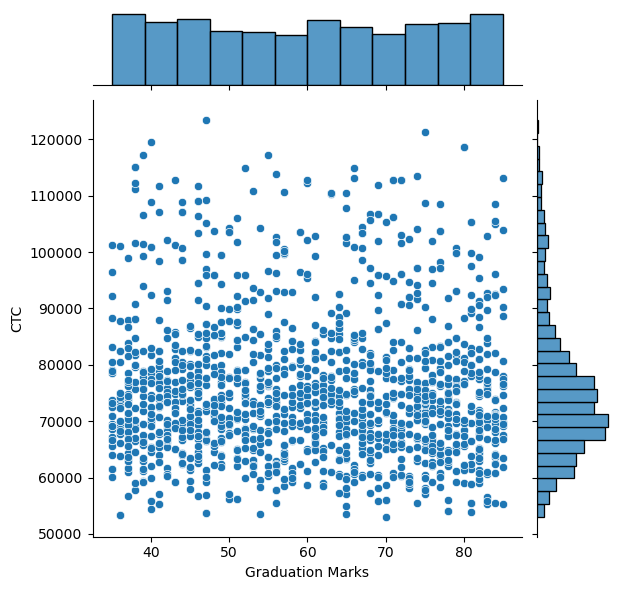

In [59]:
sns.jointplot(x =  "Graduation Marks", y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


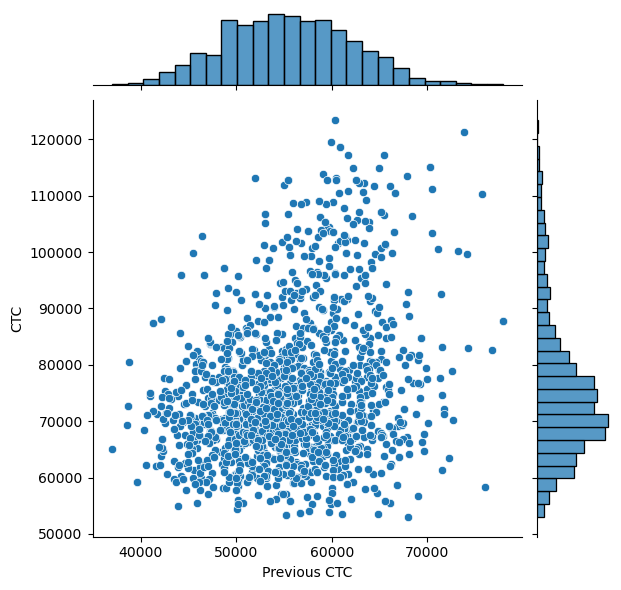

In [60]:
sns.jointplot(x= "Previous CTC", y = "CTC",data= df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


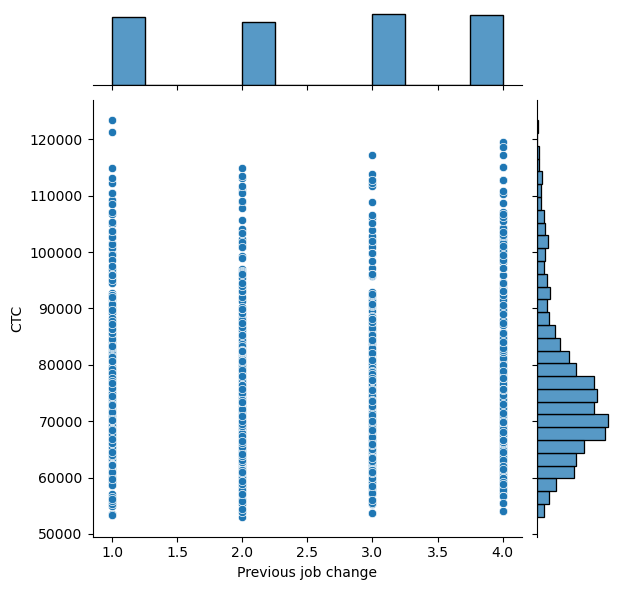

In [61]:
sns.jointplot(x = "Previous job change",y = "CTC", data = df)

ValueError: Could not interpret value `exp(Month)` for parameter `x`

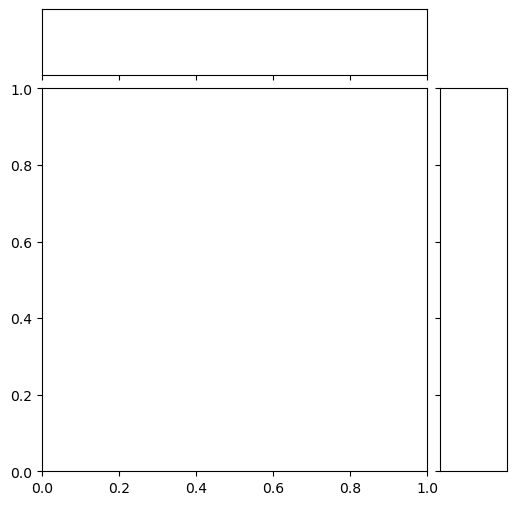

In [62]:
sns.jointplot(x = "exp(Month)",y="CTC",data=df)

2) MODEL ENGINEERING

MODEL_1 MULTI LINEAR REGRESSION
 1) USING STATSMODEL
 2) USING SKLEARN

In [63]:
df.corr()

City  Previous CTC  Previous job change  \
City                 1.000000      0.004644             0.051670   
Previous CTC         0.004644      1.000000             0.005756   
Previous job change  0.051670      0.005756             1.000000   
Graduation Marks    -0.018616     -0.032976             0.019267   
EXP (Month)         -0.023613      0.119163             0.023488   
...                       ...           ...                  ...   
College_USIT, Delhi -0.003199      0.010372             0.007171   
College_VIT Vellore  0.004148      0.016348            -0.011408   
College_VNIT Nagpur  0.056587     -0.036948             0.001808   
Role_Executive       0.048671     -0.012321             0.017150   
Role_Manager        -0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  \
City                        -0.018616    -0.023613 -0.020365   
Previous CTC                -0.032976     0.119163  0.258000   
Previous job change          0.019267     0.023488  0.011370   
Graduation Marks             1.000000    -0.057061 -0.005450   
EXP (Month)                 -0.057061     1.000000  0.301115   
...                               ...          ...       ...   
College_USIT, Delhi          0.008656    -0.029575  0.008329   
College_VIT Vellore          0.031219     0.020807 -0.019221   
College_VNIT Nagpur          0.000170    -0.007968 -0.014605   
Role_Executive              -0.017858     0.026751 -0.621311   
Role_Manager                 0.017858    -0.026751  0.621311   

                     College_Amity University  \
City                                -0.017370   
Previous CTC                         0.011549   
Previous job change                  0.006108   
Graduation Marks                     0.014417   
EXP (Month)                          0.058674   
...                                       ...   
College_USIT, Delhi                 -0.016442   
College_VIT Vellore                 -0.022173   
College_VNIT Nagpur                 -0.010991   
Role_Executive                       0.019755   
Role_Manager                        -0.019755   

                     College_Amrita University, Coimbatore  College_BIT Mesra  \
City                                             -0.026757           0.047590   
Previous CTC                                     -0.032823           0.027609   
Previous job change                              -0.005620           0.031091   
Graduation Marks                                  0.071463           0.011532   
EXP (Month)                                      -0.057549          -0.002554   
...                                                    ...                ...   
College_USIT, Delhi                              -0.015926          -0.011387   
College_VIT Vellore                              -0.021476          -0.015355   
College_VNIT Nagpur                              -0.010646          -0.007612   
Role_Executive                                   -0.029242           0.020289   
Role_Manager                                      0.029242          -0.020289   

                     College_BITS Pilani (Goa Campus)  ...  \
City                                        -0.038161  ...   
Previous CTC                                -0.021000  ...   
Previous job change                          0.022469  ...   
Graduation Marks                            -0.027700  ...   
EXP (Month)                                  0.020507  ...   
...                                               ...  ...   
College_USIT, Delhi                         -0.017190  ...   
College_VIT Vellore                         -0.023181  ...   
College_VNIT Nagpur                         -0.011491  ...   
Role_Executive                               0.004505  ...   
Role_Manager                                -0.004505  ...   

                     College_R.V. College of Engineering  \
City                                            0.034978   
Previous CTC

In [78]:
X_multi=df.loc[:,df.columns!="CTC"]

In [65]:
X_multi.head()

City  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0     0       55523.0                    3                66           19   
1     0       57081.0                    1                84           18   
2     0       60347.0                    2                52           28   
3     0       49010.0                    2                81           33   
4     0       57879.0                    4                74           32   

        CTC  College_Amity University  College_Amrita University, Coimbatore  \
0  71406.58                     False                                  False   
1  68005.87                     False                                  False   
2  76764.02                     False                                  False   
3  82092.39                     False                                  False   
4  73878.10                     False                                  False   

   College_BIT Mesra  College_BITS Pilani (Goa Campus)  ...  \
0              False                             False  ...   
1              False                             False  ...   
2              False                             False  ...   
3              False                             False  ...   
4              False                             False  ...   

   College_R.V. College of Engineering  College_SRM Main Campus  \
0                                False                    False   
1                                False                    False   
2                                False                    False   
3                                False                    False   
4                                False                    False   

   College_SVNIT Surat  College_TIET/Thapar University  \
0                 True                           False   
1                False                           False   
2                False                           False   
3                False                           False   
4                False                           False   

   College_Techno India, Kolkata  College_USIT, Delhi  College_VIT Vellore  \
0                          False                False                False   
1                          False                False                False   
2                          False                False                False   
3                          False                False                False   
4                          False                False                False   

   College_VNIT Nagpur  Role_Executive  Role_Manager  
0                False           False          True  
1                False            True         False  
2                False            True         False  
3                False            True         False  
4                False            True         False  

[5 rows x 74 columns]

In [66]:
y_multi=df["CTC"]

In [67]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [75]:
X_multi_cons= sn.add_constant(X_multi)

In [76]:
X_multi_cons.head()

const  City  Previous CTC  Previous job change  Graduation Marks  \
0    1.0     0       55523.0                    3                66   
1    1.0     0       57081.0                    1                84   
2    1.0     0       60347.0                    2                52   
3    1.0     0       49010.0                    2                81   
4    1.0     0       57879.0                    4                74   

   EXP (Month)       CTC  College_Amity University  \
0           19  71406.58                     False   
1           18  68005.87                     False   
2           28  76764.02                     False   
3           33  82092.39                     False   
4           32  73878.10                     False   

   College_Amrita University, Coimbatore  College_BIT Mesra  ...  \
0                                  False              False  ...   
1                                  False              False  ...   
2                                  False              False  ...   
3                                  False              False  ...   
4                                  False              False  ...   

   College_R.V. College of Engineering  College_SRM Main Campus  \
0                                False                    False   
1                                False                    False   
2                                False                    False   
3                                False                    False   
4                                False                    False   

   College_SVNIT Surat  College_TIET/Thapar University  \
0                 True                           False   
1                False                           False   
2                False                           False   
3                False                           False   
4                False                           False   

   College_Techno India, Kolkata  College_USIT, Delhi  College_VIT Vellore  \
0                          False                False                False   
1                          False                False                False   
2                          False                False                False   
3                          False                False                False   
4                          False                False                False   

   College_VNIT Nagpur  Role_Executive  Role_Manager  
0                False           False          True  
1                False            True         False  
2                False            True         False  
3                False            True         False  
4                False            True         False  

[5 rows x 75 columns]

In [83]:
m1_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [74]:
m1_multi_stats.summary()

NameError: name 'm1_multi_stats' is not defined

In [85]:
m1_multi_lr = LinearRegression()

In [86]:
m1_multi_lr.fit(X_multi, y_multi)

LinearRegression()

In [87]:
print(m1_multi_lr.intercept_, m1_multi_lr.coef_)

47858.20091579893 [ 3.35283754e+02  4.11593455e-01  8.47777754e+01  1.14868861e+00
  2.55673915e+02  1.04718247e+03 -1.44083572e+03  1.06664542e+03
  1.34502740e+01  2.54641612e+03  6.95852504e+02 -9.79642902e+02
 -5.51861720e+01  1.68601814e+03  2.22524697e+03 -2.56553841e+03
 -2.36637658e+03  2.10930445e+02 -1.13716958e+03 -5.72522108e+03
 -8.08442578e+02 -3.36160240e+02  3.74262582e+03  2.39033596e+03
  6.90801799e+03 -5.32631401e+02 -5.10837318e+02  1.72530255e+03
 -1.23794299e+03 -7.87982151e+02  1.33516786e+03 -2.89222998e+03
  1.44563891e+02 -2.45796839e+03 -1.55583972e+03 -2.22440187e+03
 -3.82942619e+02  8.77724704e+02 -1.27778365e+03 -1.11190574e+03
 -3.63543121e+03 -2.43565841e+03 -4.19763802e+03 -3.67047804e+02
  1.44300128e+02 -2.99688126e+03  1.20389344e+03 -2.89872158e+03
  2.22795365e+03  4.46236249e+02 -2.33191072e+03  3.23707895e+03
 -7.42884389e+02 -1.03340532e+03  1.19874931e+03  3.70499686e+03
  3.05313771e+03  1.30055016e+03  1.50845484e+03  1.75254842e+03
  2.219

In [88]:
y_pred = m1_multi_lr.predict(X_multi)

In [91]:
mse= mean_squared_error(y_multi, y_pred)
r2=r2_score(y_multi,y_pred)

In [92]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  69925533.43702742 
R2 Score - 0.5583839664553448


NOTE: SINCE OUR DEPENDENT VARIABLE IS CONTINUOUS SUCH THAT CLASSIFICATION METHODS ARE NOT APPLICABLE

MODEL_2 :DECISION TREE REGRESSOR

In [95]:
X = df.loc[:,df.columns!="CTC"]

In [96]:
y=df["CTC"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 73) (318, 73) (1271,) (318,)


In [100]:
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [101]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [103]:
y_train_pred= regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [105]:
mse= mean_squared_error(y_test, y_test_pred)
r2=r2_score(y_test, y_test_pred)

In [109]:
print("Mean Squared Error - ",mse,"\nR2 Score-",r2)

Mean Squared Error -  60424631.026134744 
R2 Score- 0.5927831611924912


In [111]:
dot_data=tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled= True)

Model_3 : RANDOM FOREST REGRESSOR

In [113]:
rf= RandomForestRegressor(n_estimators=250, random_state=42)

In [114]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [115]:
predictions=rf.predict(X_test)

In [118]:
mse= mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)

In [120]:
print ("Mean Squared Error- ",mse,"\nR2 Score - ",r2)

Mean Squared Error-  56077092.57206623 
R2 Score -  0.6220823200916847


Model_6 - ridge regression

standardizing

In [122]:
scaler= StandardScaler()

In [123]:
scaler.fit(X_train)

StandardScaler()

In [124]:
scaler.fit(X_train)

StandardScaler()

In [125]:
X_train_s =  scaler.transform(X_test)

In [126]:
X_test_s = scaler.transform(X_test)

In [127]:
lm_r=Ridge(alpha=0.5)

In [132]:
lm_r.fit(X_train_s, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1271]

In [130]:
y_pred=lm_r.predict(X_test_s)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [133]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1589]

In [134]:
print("Mean Squared Error - ",mse,"\nR2 Score- ",r2)

Mean Squared Error -  56077092.57206623 
R2 Score-  0.6220823200916847


CHANGING HYPER PARAMETERS

In [136]:
from sklearn.model_selection import validation_curve

In [137]:
param_range = np.logspace(-2,8,100)

In [138]:
train_scores, test_scores = validation_curve(
    Ridge(),
    X_train_s,
    y_train,
    param_name="alpha",
    param_range=param_range,
    scoring= "r2"
)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1271]

In [141]:
train_mean=np.mean(train_scores, axis = 1)

NameError: name 'train_scores' is not defined

In [142]:
test_mean = np.mean(test_scores,axis=1)

NameError: name 'test_scores' is not defined

In [143]:
max(test_mean)

NameError: name 'test_mean' is not defined

In [145]:
sns.jointplot(x=np.log(param_range), y = test_mean)

NameError: name 'test_mean' is not defined

In [146]:
param_range[30]

10.722672220103231

In [149]:
lm_r_best= Ridge(alpha= param_range[30])

In [150]:
lm_r_best.fit(X_train_s, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1271]

THE OPTIMUM OF ALPHA IS 10.722672220103231

In [153]:
y_pred_best= lm_r.predict(X_test_s)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [154]:
r2_score(y_test, y_pred_best)

NameError: name 'y_pred_best' is not defined

MODEL_7 LASSO REGRESSION

In [157]:
lm_s = Lasso(alpha=0.5)

In [158]:
lm_s.fit(X_train_s, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1271]

In [159]:
y_pred= lm_s.predict(X_test_s)

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1589]

In [161]:
print("Mean Squared Error- ",mse,"\nR2 Score-",r2)

Mean Squared Error-  56077092.57206623 
R2 Score- 0.6220823200916847


CHANGING HYPER PARAMETERS

In [162]:
from sklearn.model_selection import validation_curve

In [163]:
param_range = np.logspace(-2,8,100)

In [165]:
train_scores,test_scores = validation_curve(
    Lasso(),
    X_train_s,
    y_train,
    param_name="alpha",
    param_range= param_range,
    scoring= "r2"
)

ValueError: Found input variables with inconsistent numbers of samples: [318, 1271]

In [170]:
train_mean = np.mean(test_scores,axis=1)

NameError: name 'test_scores' is not defined

In [171]:
test_mean = np.mean(test_scores, axis=1)

NameError: name 'test_scores' is not defined

In [172]:
max(test_mean)

NameError: name 'test_mean' is not defined

QUES 1: VIEWS ABOUT PROBLEM STATEMENT?
NAS- the problem statement highlights the critical business challenges of determining the salaries of newly hired employees, techworks consulting emphasis on cosidering various factors like:
1) city
2) college
3) previous ctc
4) role
5) exp
6) grad marks
7) previous job change
   the incorporation of machine learning,specially regression suggests a forward looking approach to automate and optimize  salary prediction based on provided dataset.

ques 2 what will be your approach solving this task?
ans- my approach:
1) data processing
   a)missing values
   b)outliers
   c)categorical variables
2) modeling
   a)model selection
   b) evaluation
   c) tuning and optimization
3) predictive analysis

ques 3- what were the available ml model options you had to perform this task?
1) linear regression
2) decision tree regressor
3) random forest regressor
4) gradient boosting machine regressor
5) ridge regression
6) Lasso regression

ques 4 
ans- random forest regressor is the best model for thos dataset in order to predict the salaries for newly hired employees.
because(reason): it gives max accuracy and min r2 score as compared to other models.
 accuracies of ml models: - 
 1) linear regression:-0.5343159981702307
 2) ridge regression-0.5355953891144283
 3) laso regression-0.5356055546226256
 4) decision tree regression-0.5927831611924911
 5) random forest regression-0.6614866965940986
 6) gradient boosting machine regressor-0.6326923737826373

question 5:- 
ans:steps that can be taken: -
1) gathering more data
2) hyperparameter tuning
3) ensemble methods
4) early stopping
5) feature importance analysis
